In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv("Forbes_2000_top_company_CLNQ11.csv")
df.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2022 Ranking             1999 non-null   int64  
 1   Organization Name        1999 non-null   object 
 2   Industry                 1999 non-null   object 
 3   Country                  1999 non-null   object 
 4   Year Founded             1999 non-null   int64  
 5   CEO                      1999 non-null   object 
 6   Revenue (Billions)       1999 non-null   float64
 7   Profits (Billions)       1999 non-null   float64
 8   Assets (Billions)        1999 non-null   float64
 9   Market Value (Billions)  1999 non-null   float64
 10  Total Employees          1999 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 171.9+ KB


In [5]:
df.describe()

,2022 Ranking,Year Founded,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions)
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,999.818409,1863.992496,23.886628,2.503167,117.176013,38.260675
std,577.098137,421.815723,40.951362,6.160483,363.826515,117.233301
min,1.000000,0.000000,0.000000,-12.050000,0.170000,0.140000
25%,500.500000,1919.000000,5.600000,0.590000,14.800000,7.335000
50%,1000.000000,1971.000000,12.170000,1.060000,32.100000,16.640000
75%,1499.000000,1996.000000,23.730000,2.270000,77.880000,34.720000
max,1999.000000,2022.000000,572.750000,105.360000,5518.510000,2640.320000


In [6]:
df.isna().sum()

2022 Ranking               0
Organization Name          0
Industry                   0
Country                    0
Year Founded               0
CEO                        0
Revenue (Billions)         0
Profits (Billions)         0
Assets (Billions)          0
Market Value (Billions)    0
Total Employees            0
dtype: int64

In [7]:
df.nunique()

2022 Ranking               1684
Organization Name          1999
Industry                     29
Country                      57
Year Founded                214
CEO                        1963
Revenue (Billions)         1587
Profits (Billions)          688
Assets (Billions)          1790
Market Value (Billions)    1665
Total Employees            1748
dtype: int64

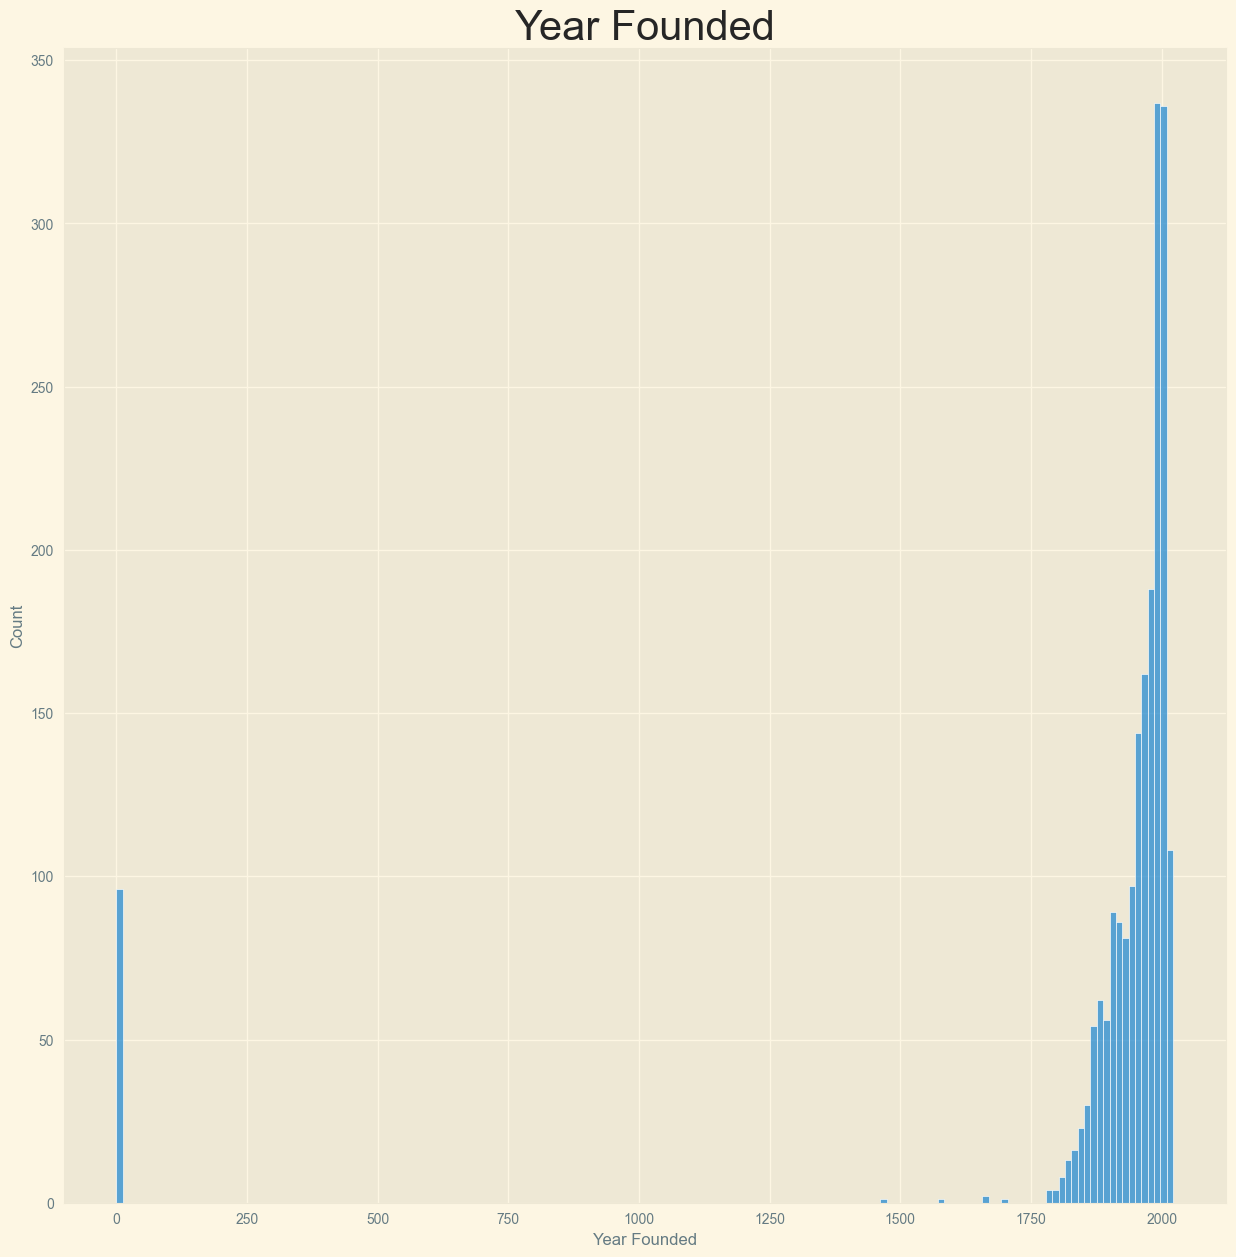

In [8]:
plt.figure(figsize = (15,15))
sns.histplot(data = df, x = 'Year Founded')
plt.title('Year Founded',fontsize=30)
plt.show()

array([<AxesSubplot: ylabel='count'>], dtype=object)

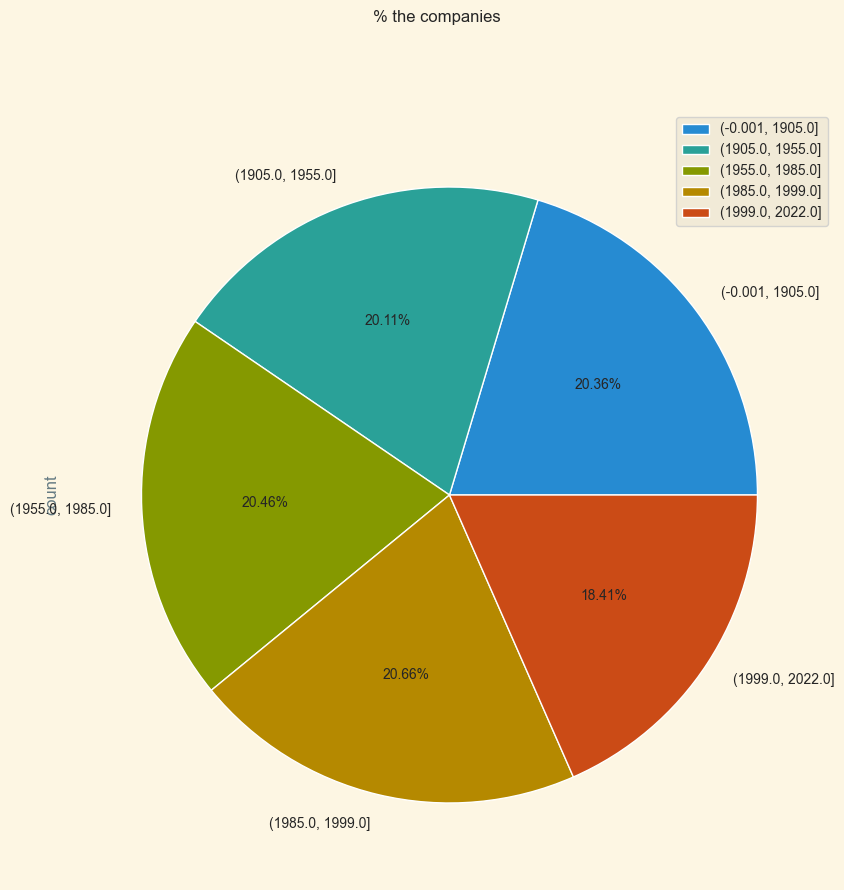

In [9]:
df['Year Founded_group_q']=pd.qcut(df['Year Founded'], 5)
YFGQ=df.groupby('Year Founded_group_q')['Organization Name'].agg(['count'])
YFGQ.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='% the companies',figsize=(10,10))

In [11]:
def Year_Founded(x):
    if x <= 1500 :
        x= 'the company is more than 500 y/o'
    elif x >1501 and x <=1750:
        x= 'companies from 499 to 272 y/o'
    elif x >1751 and x <=1850:
        x= 'companies from 271 to 172 y/o'
    elif x >1851 and x <=2000:
        x= 'companies from 171 to 22 y/o'
    else:
        x= 'companies under the age of 22'
    return x

In [12]:
df['Year_Founded']=df['Year Founded'].apply(Year_Founded)

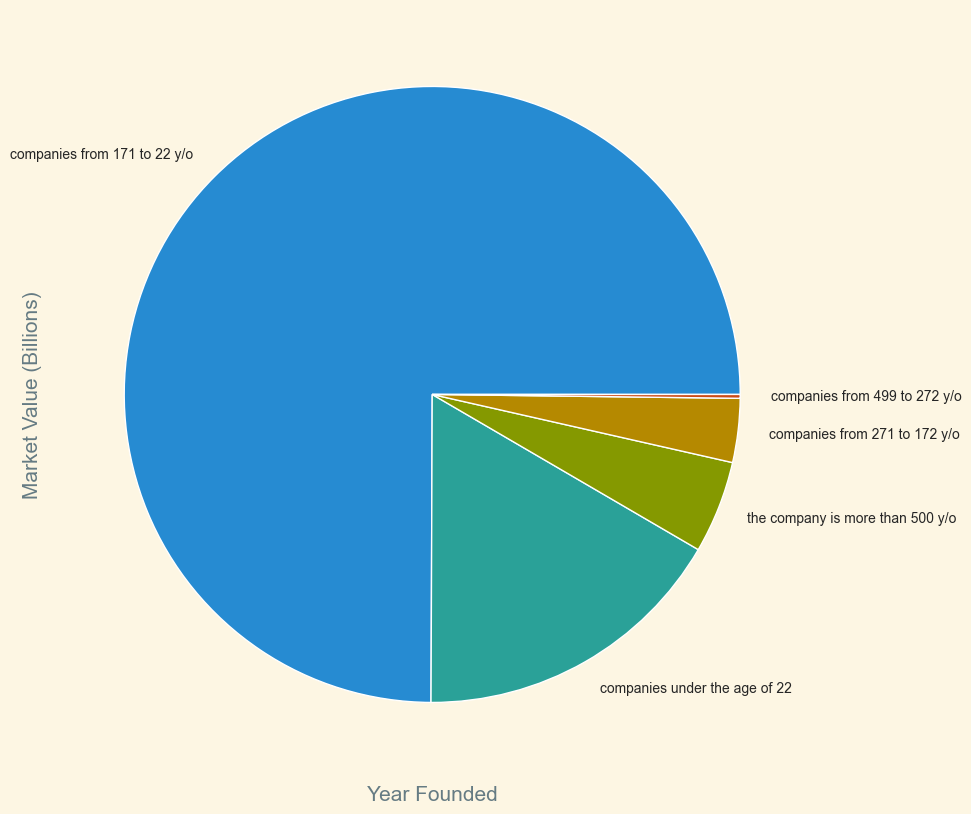

In [13]:
df['Year_Founded'].value_counts().plot(kind='pie', figsize=(10,10))
plt.xlabel("Year Founded", fontsize=15)
plt.ylabel("Market Value (Billions)", fontsize=15)
plt.show()

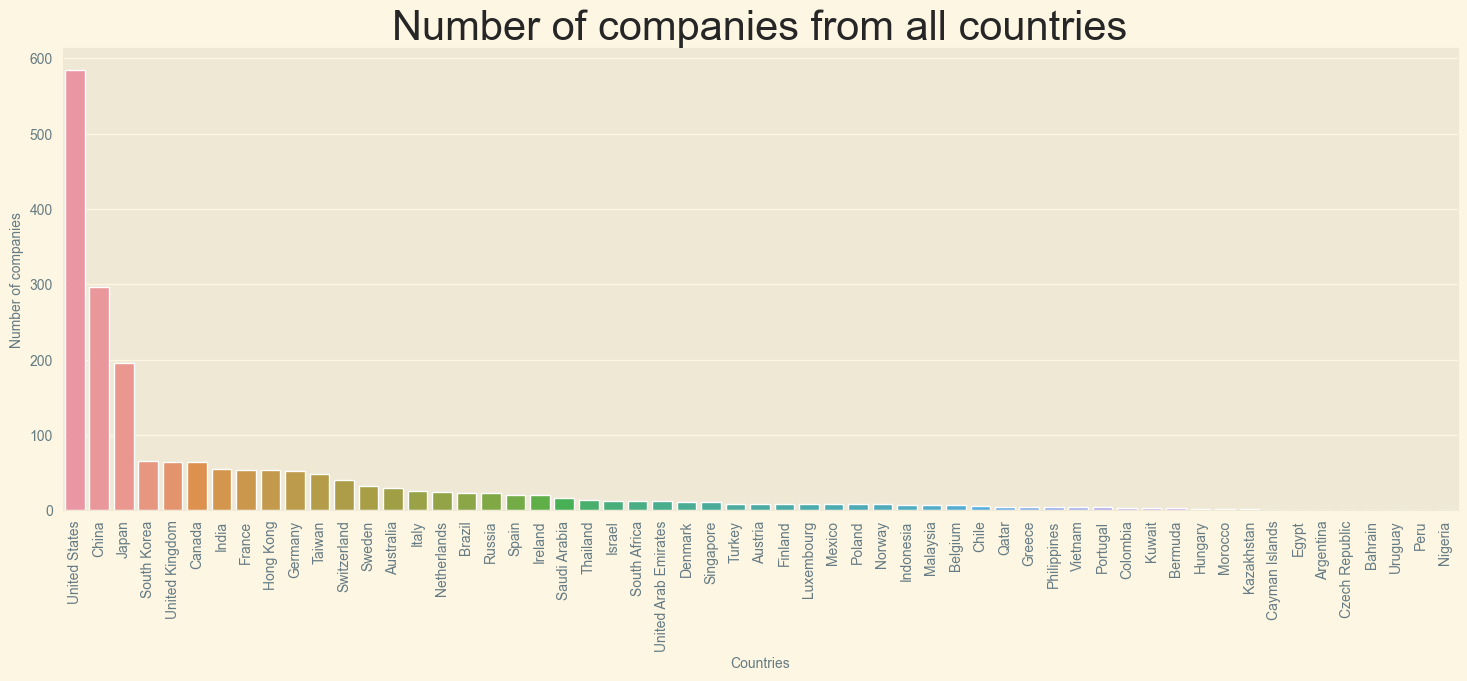

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("Number of companies", fontsize=10)
plt.xlabel("Countries", fontsize=10)
plt.title("Number of companies from all countries", fontsize=30)
plt.show()

In [15]:
df['Country'].value_counts().head(5)

United States     584
China             297
Japan             196
South Korea        65
United Kingdom     64
Name: Country, dtype: int64

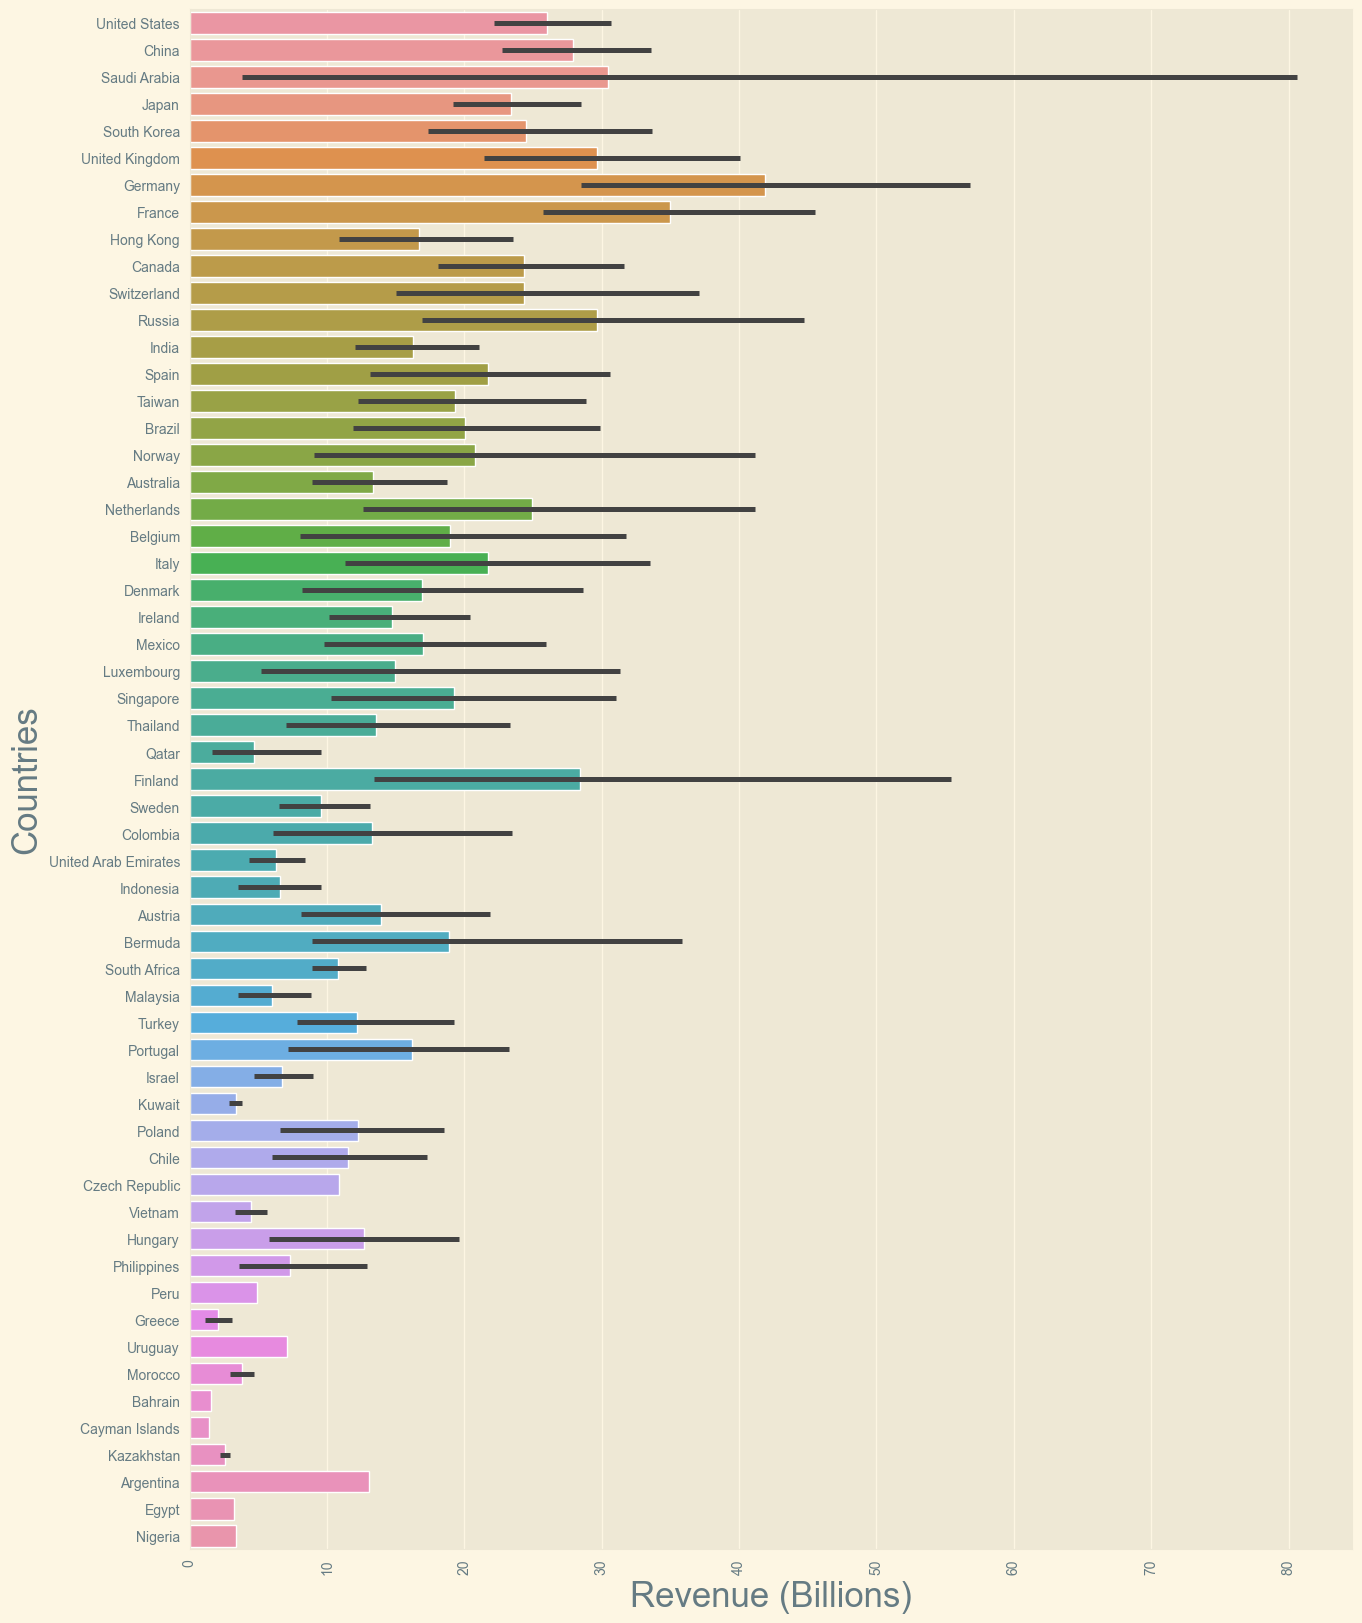

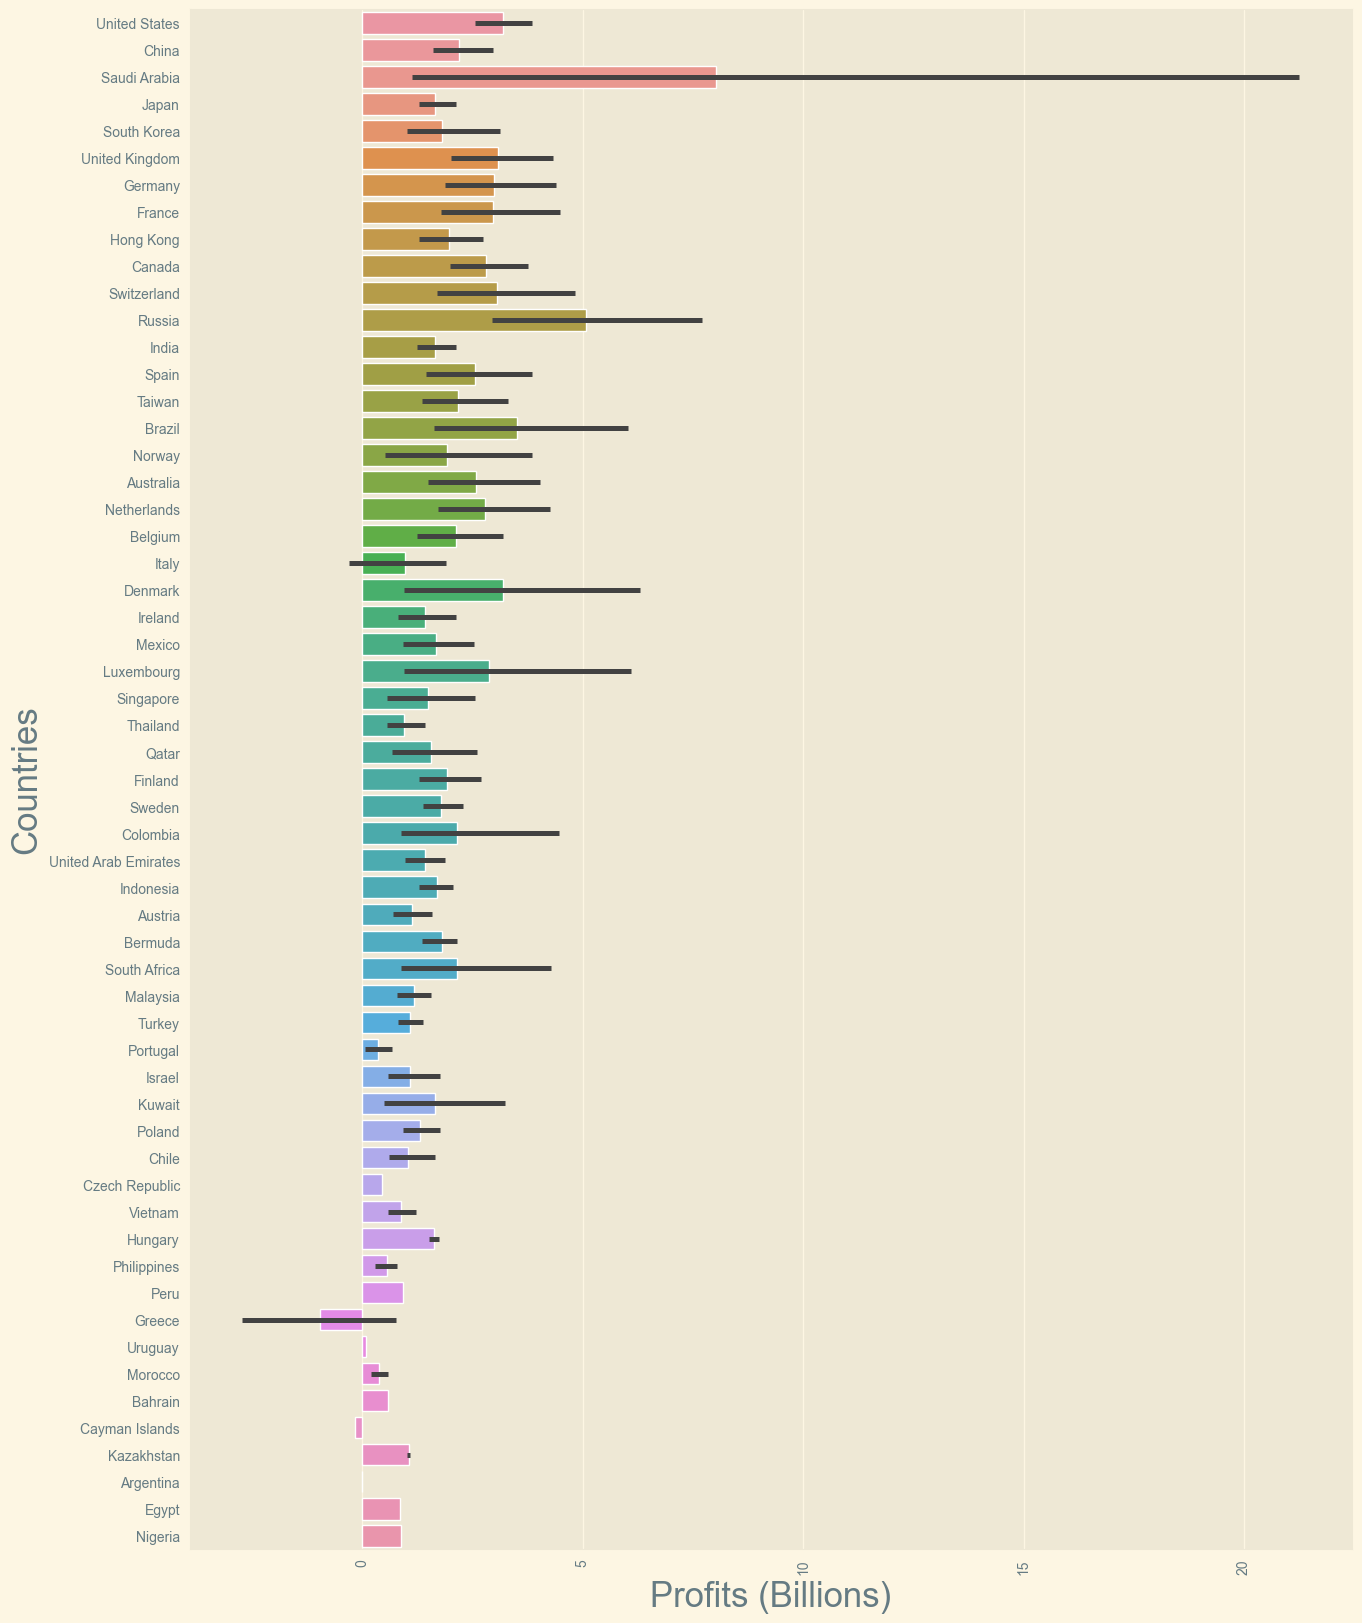

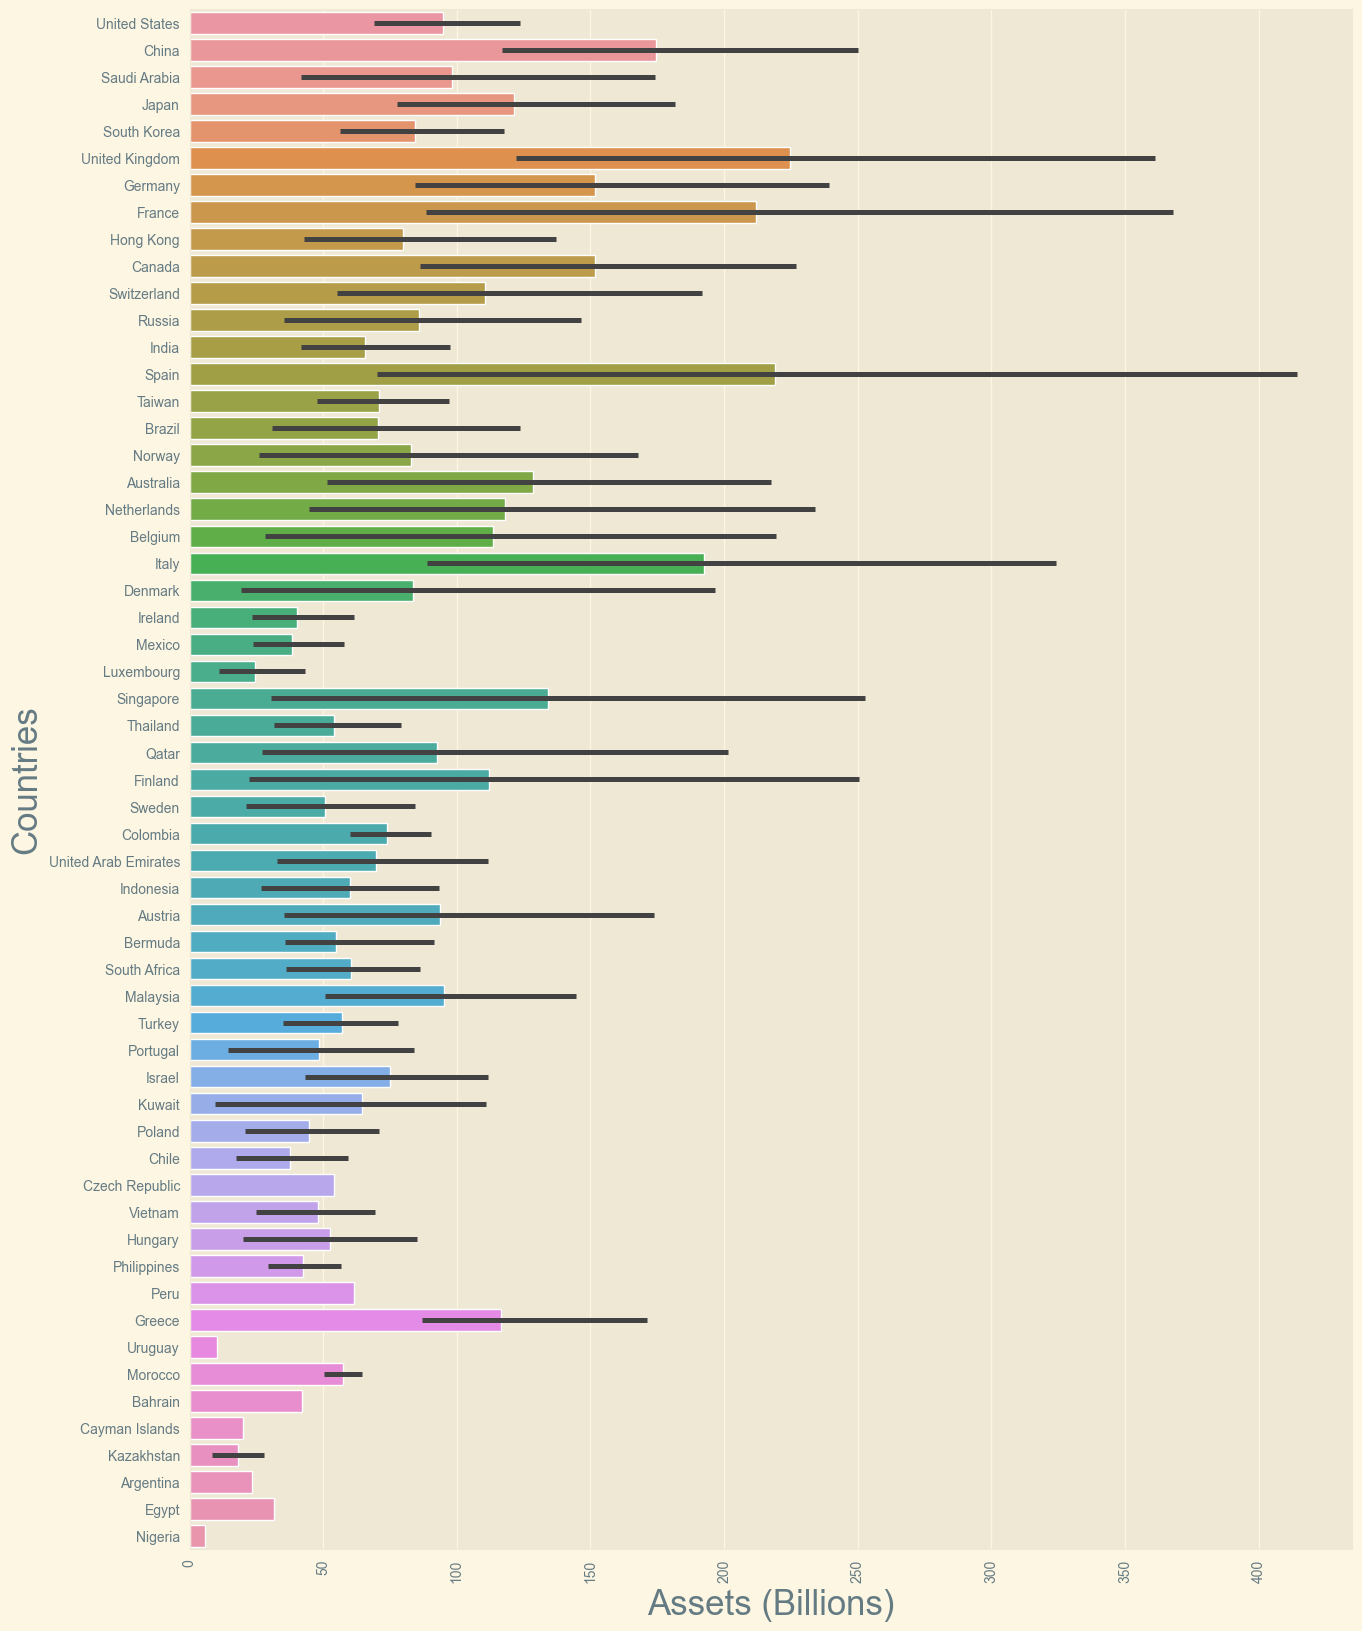

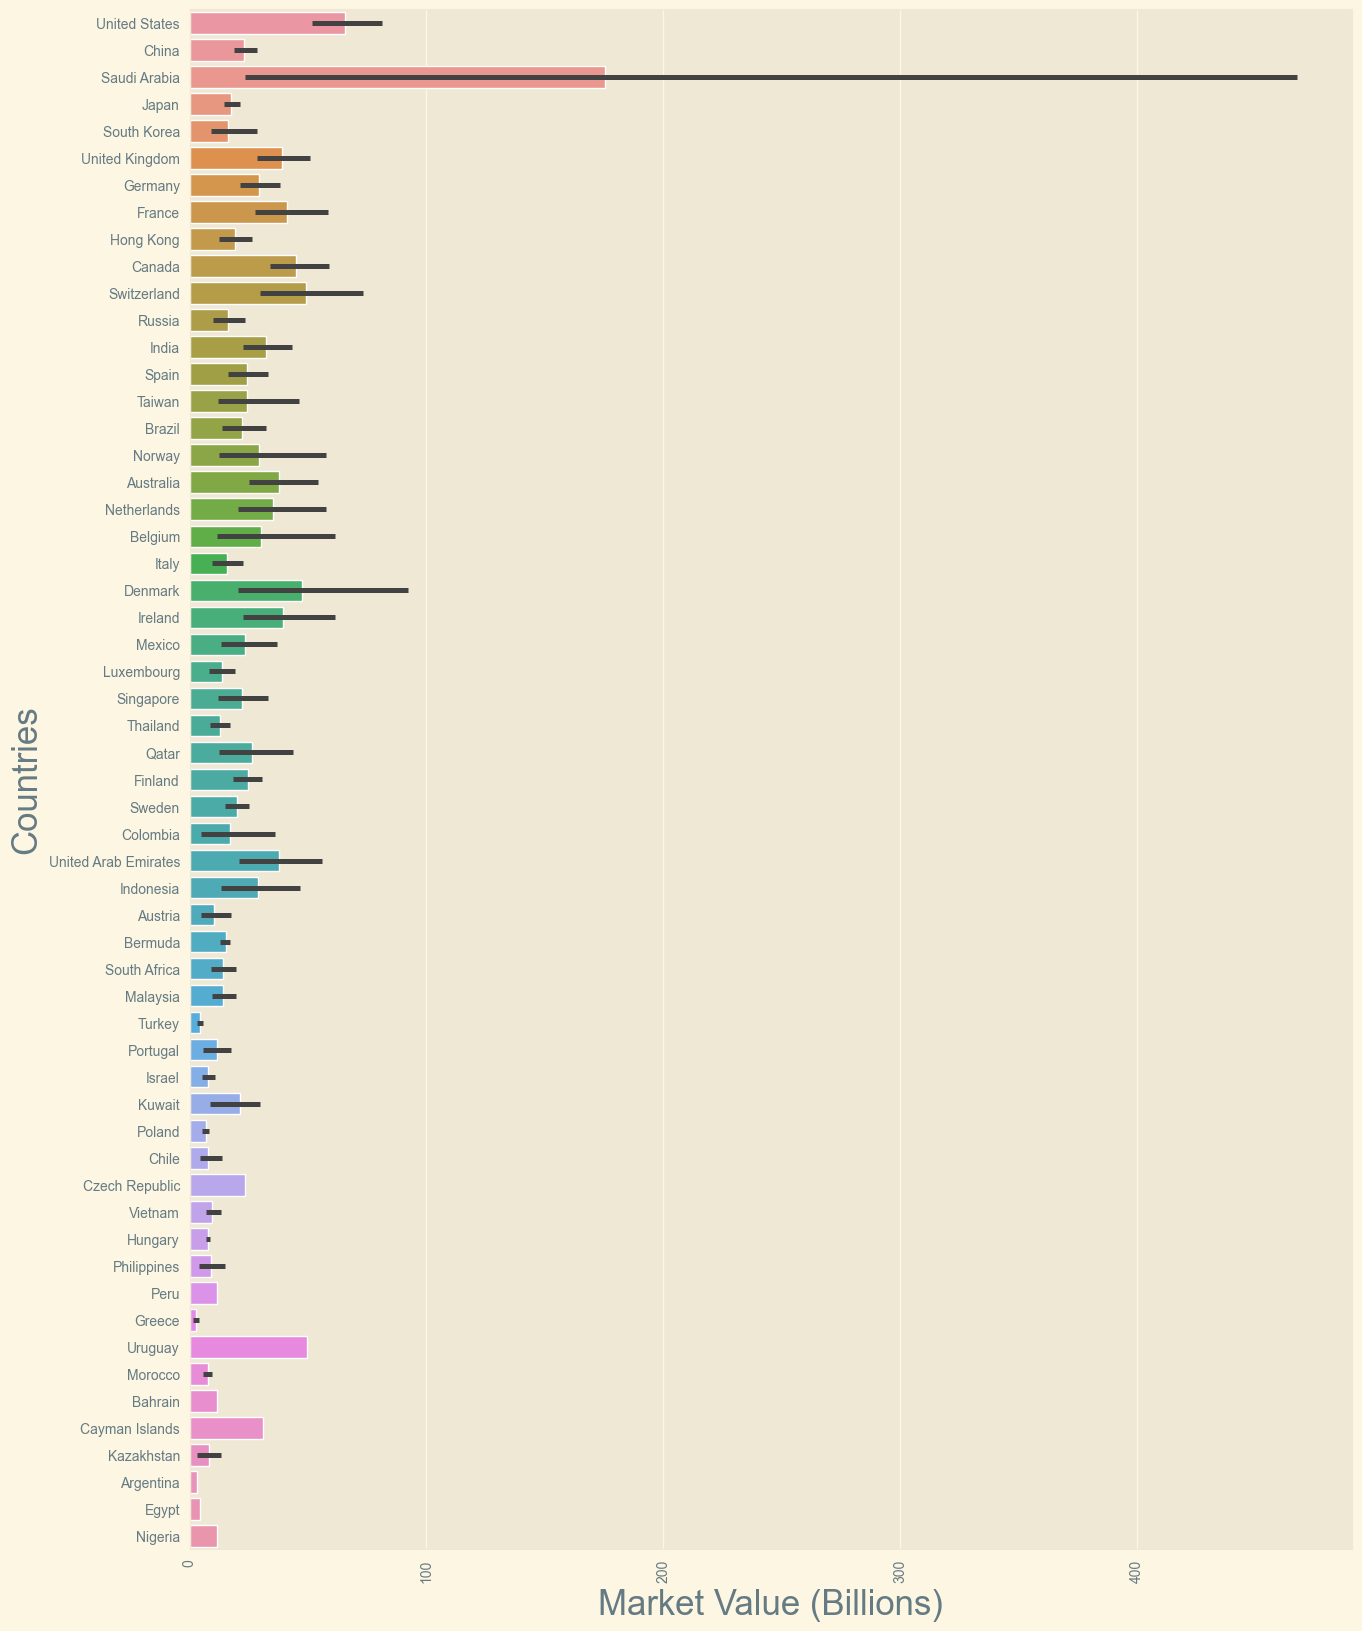

In [16]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Revenue (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Revenue (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Profits (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Profits (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Assets (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Assets (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Market Value (Billions)", y = "Country")
plt.xticks(rotation=90)
plt.xlabel("Market Value (Billions)", fontsize=25)
plt.ylabel("Countries", fontsize=25)
plt.show()

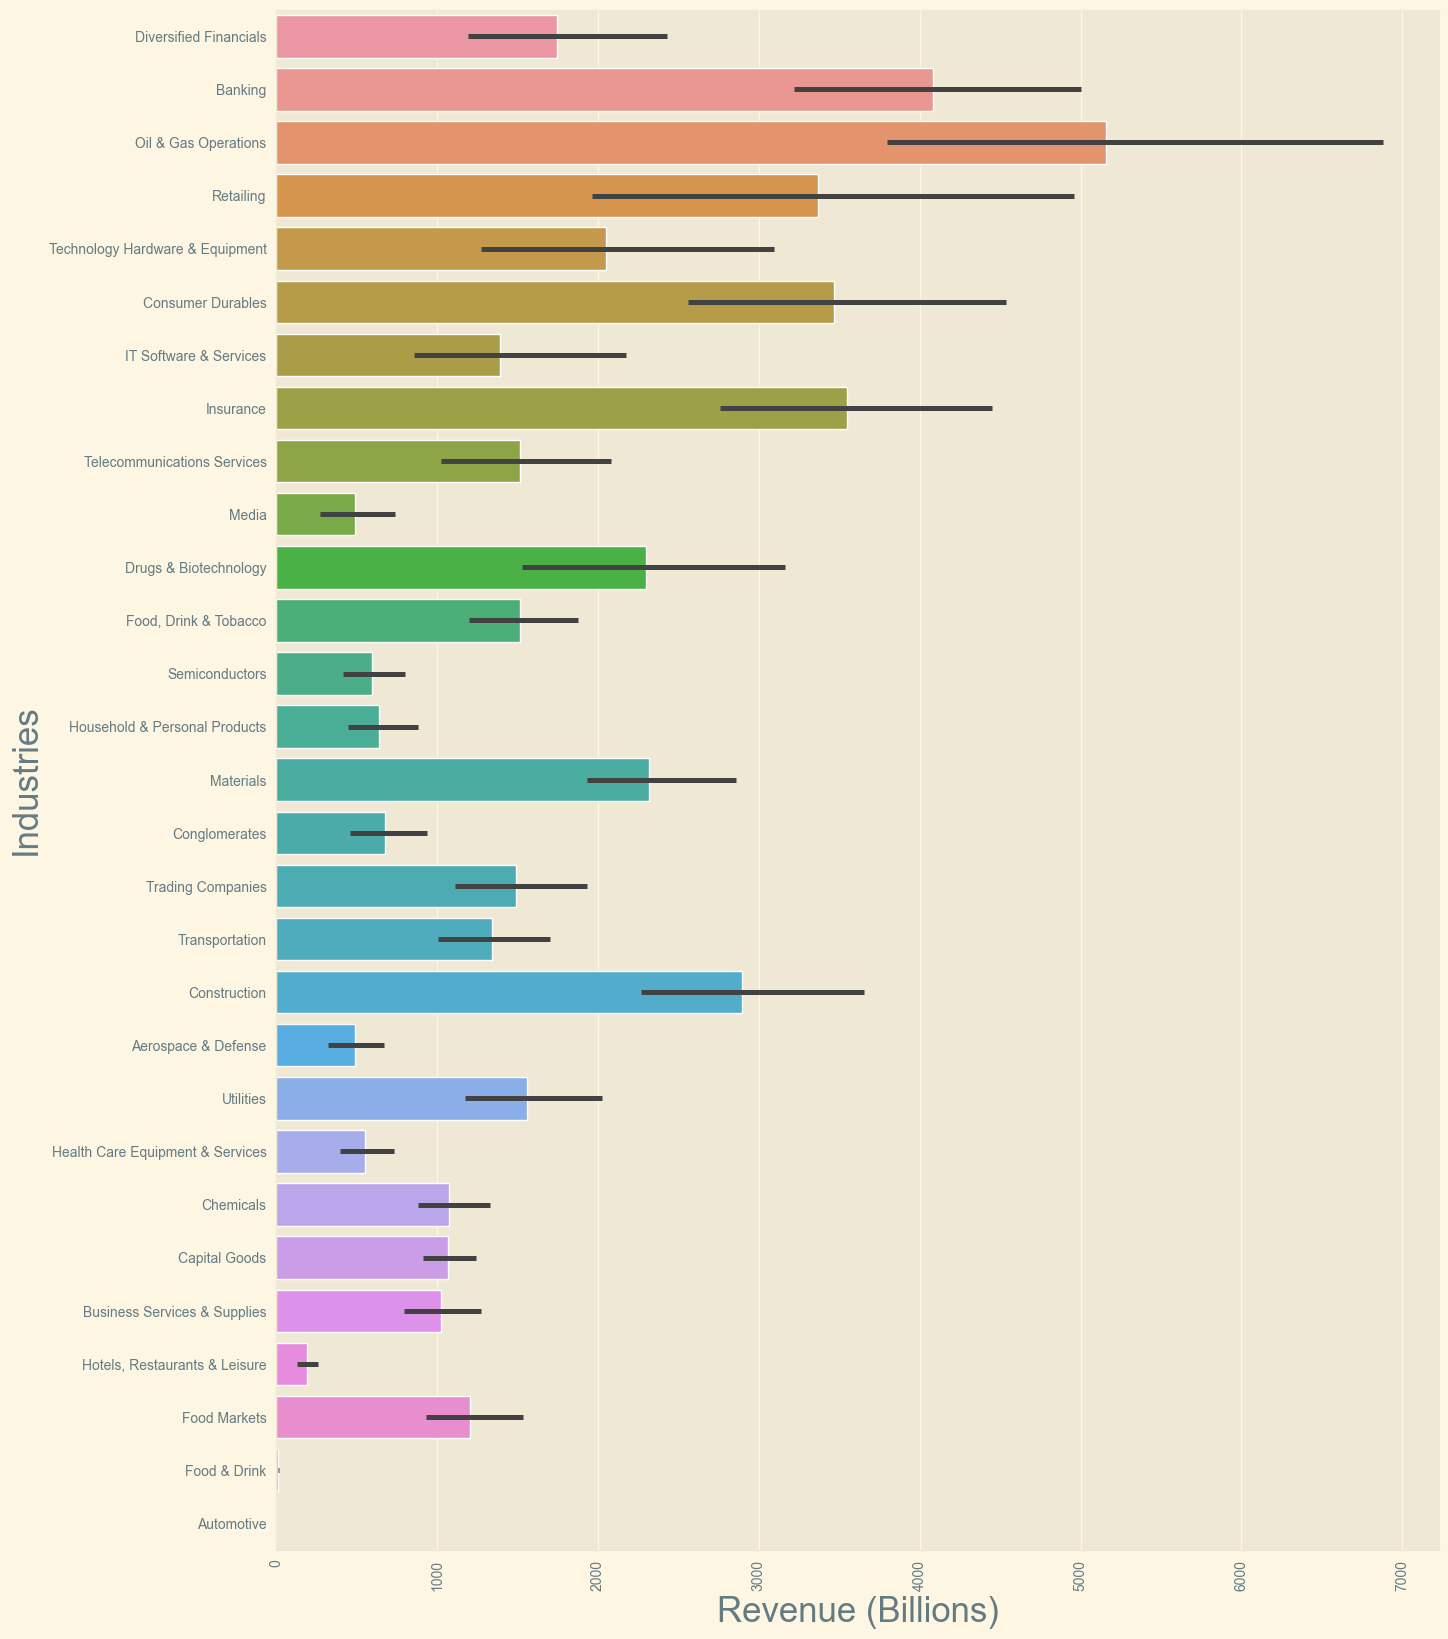

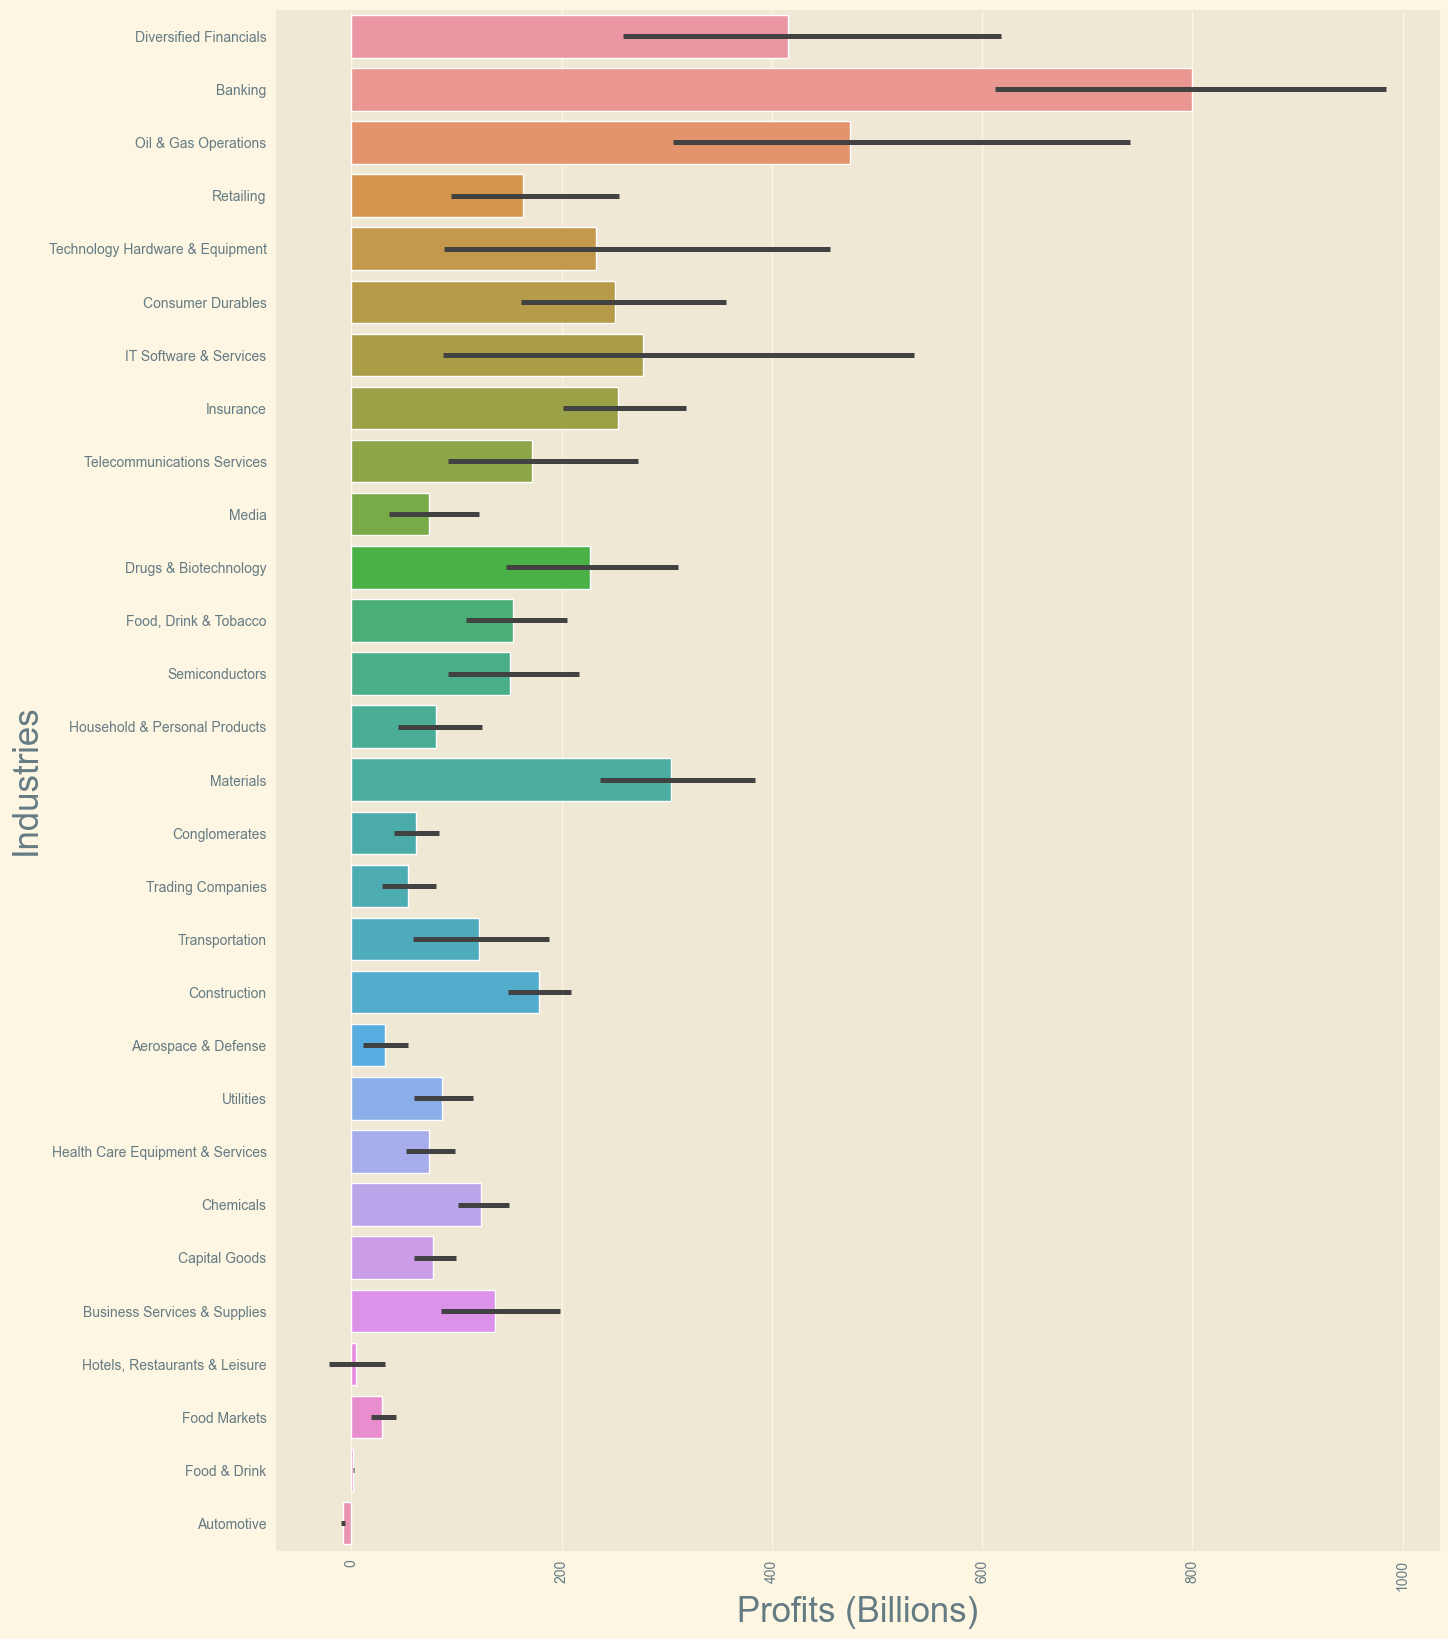

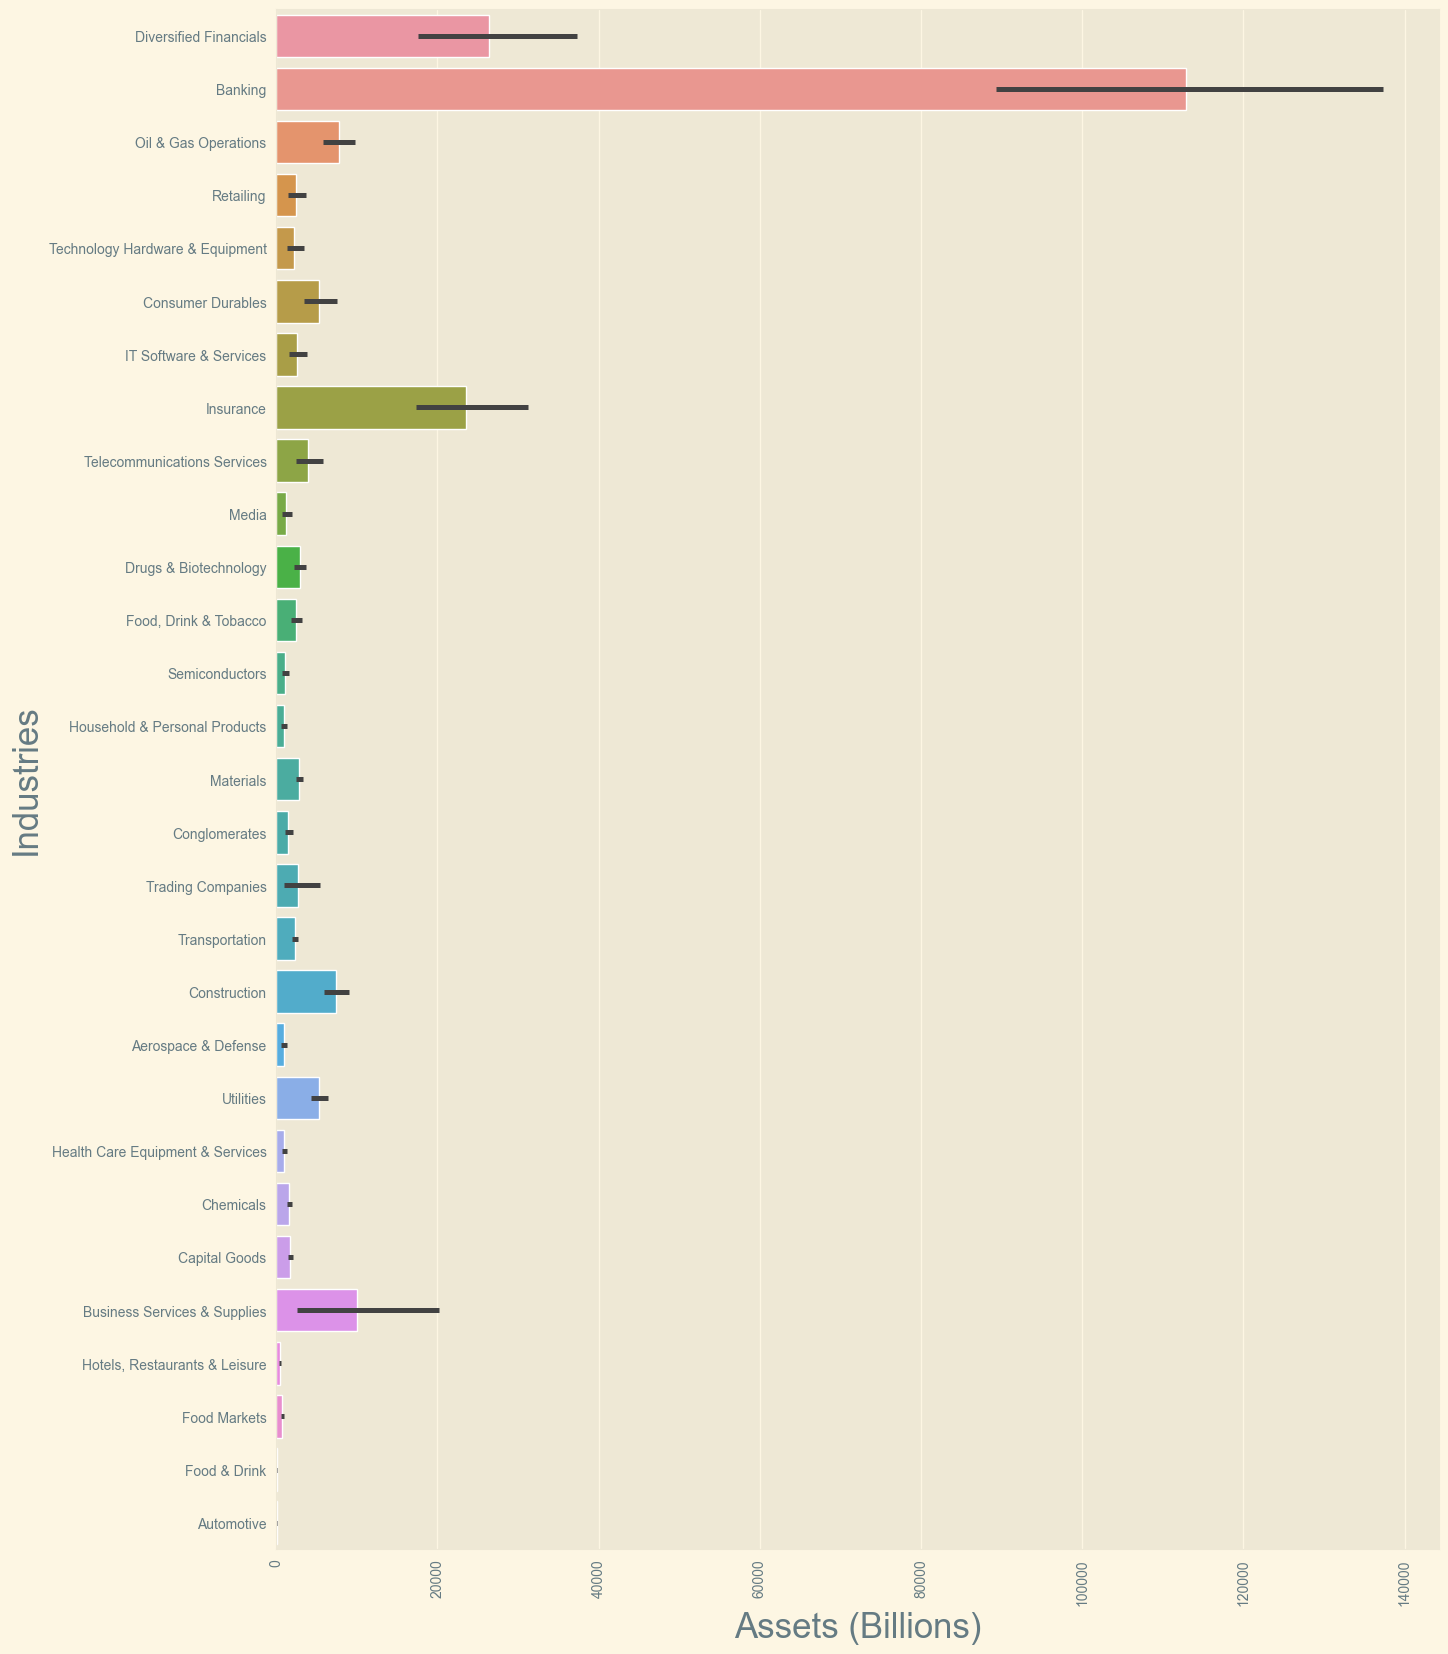

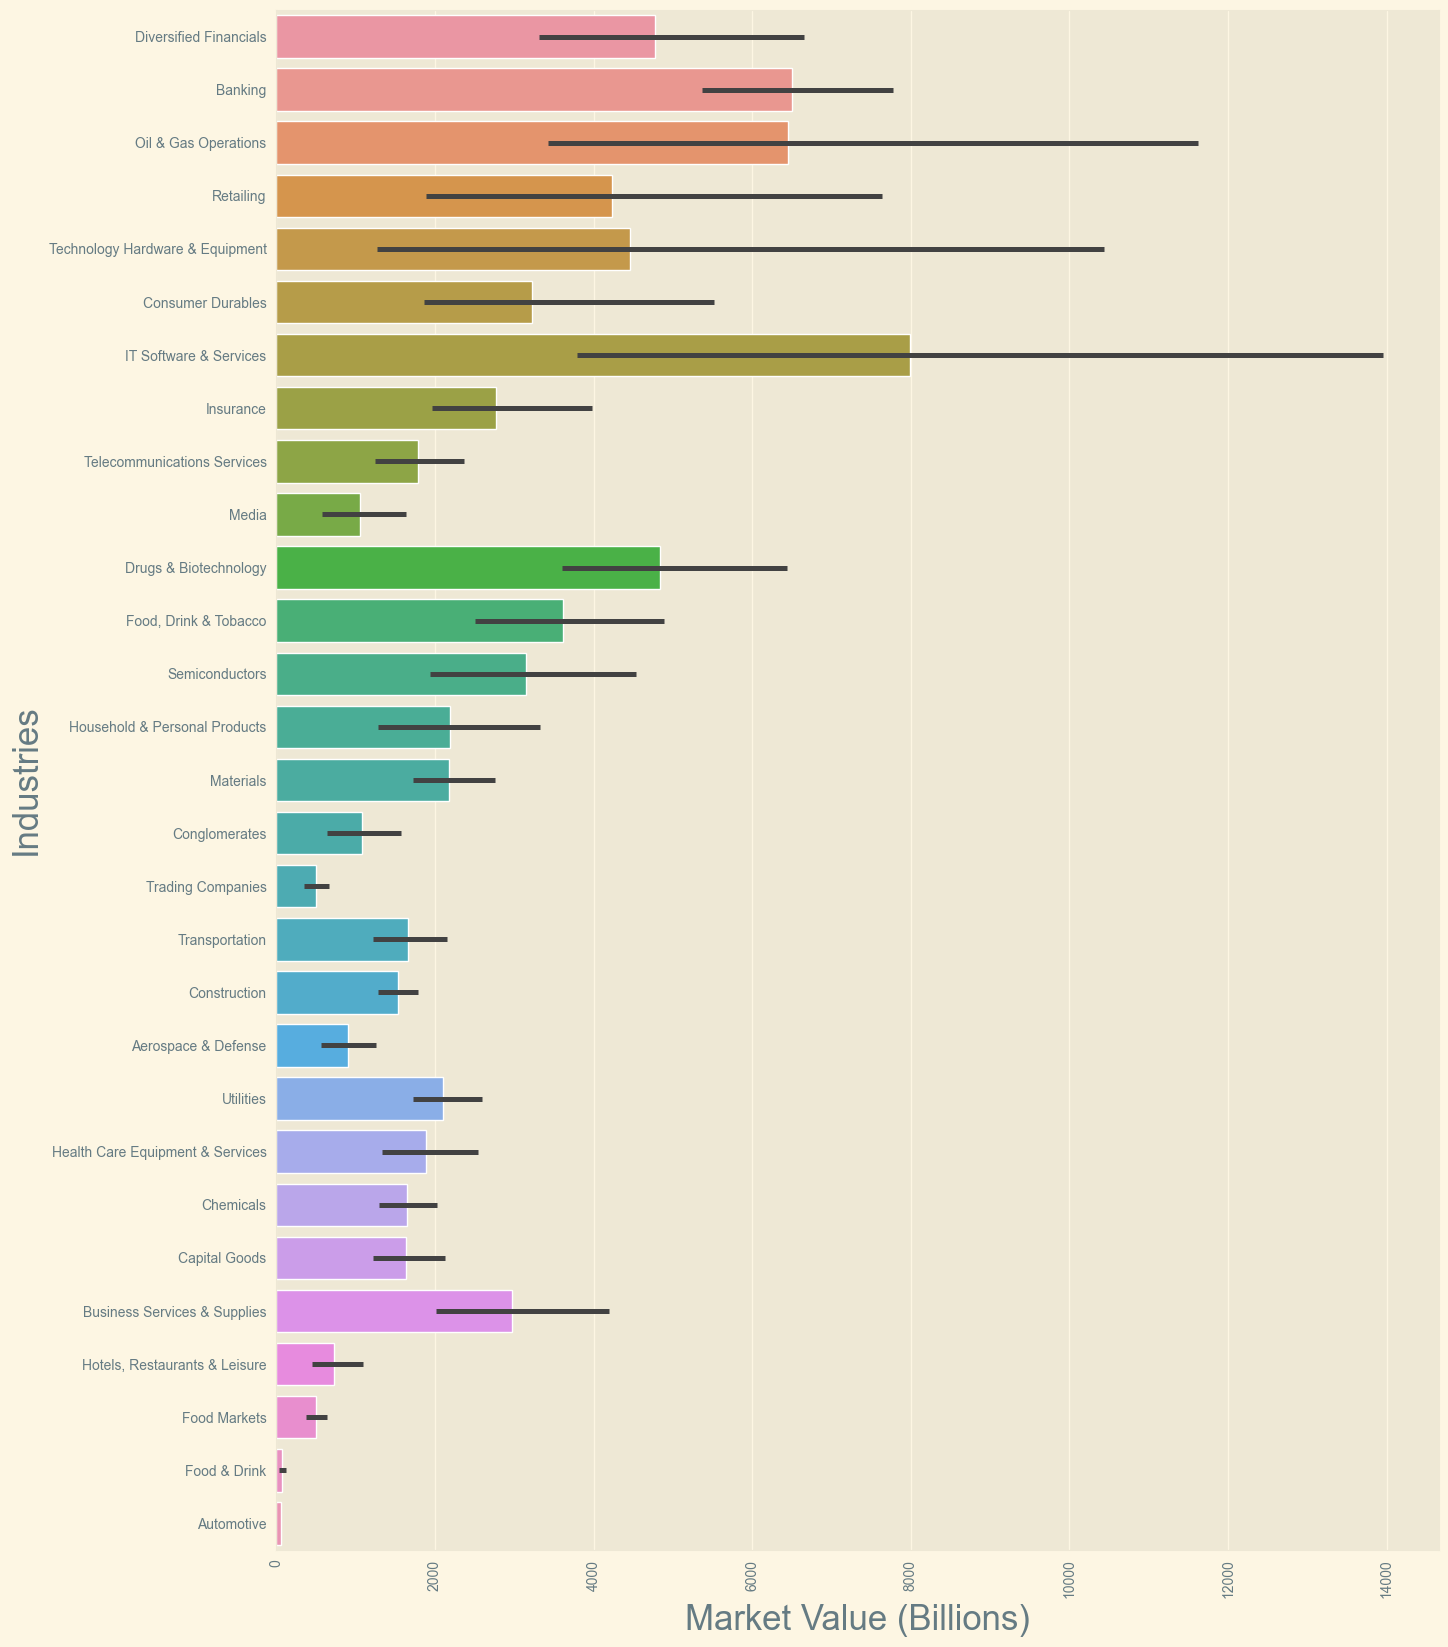

In [17]:
plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Revenue (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Revenue (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Profits (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Profits (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Assets (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Assets (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

plt.figure(figsize=(15,20))
sns.barplot(data=df, x = "Market Value (Billions)", y = "Industry",estimator = sum)
plt.xticks(rotation=90)
plt.xlabel("Market Value (Billions)", fontsize=25)
plt.ylabel("Industries", fontsize=25)
plt.show()

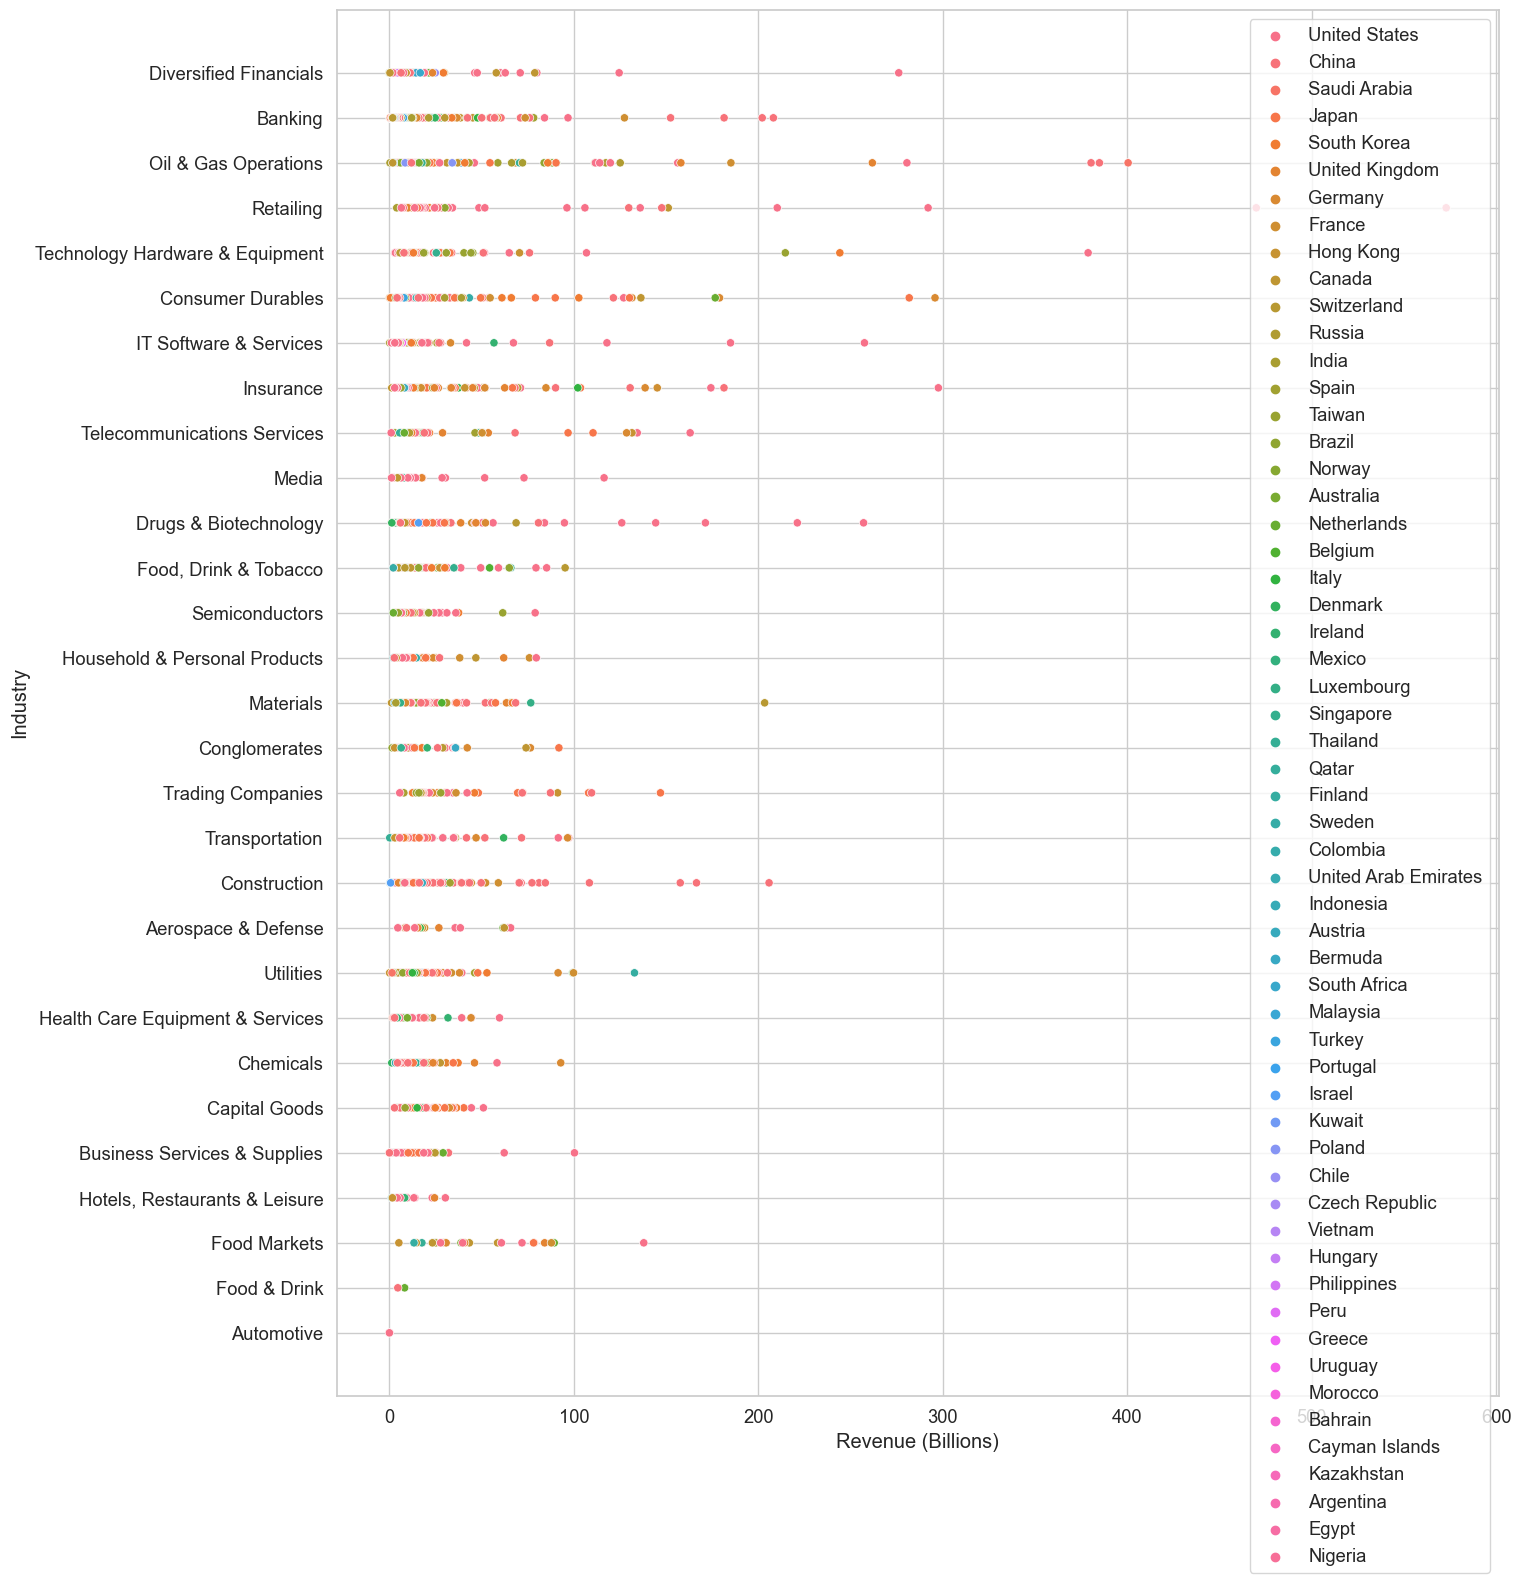

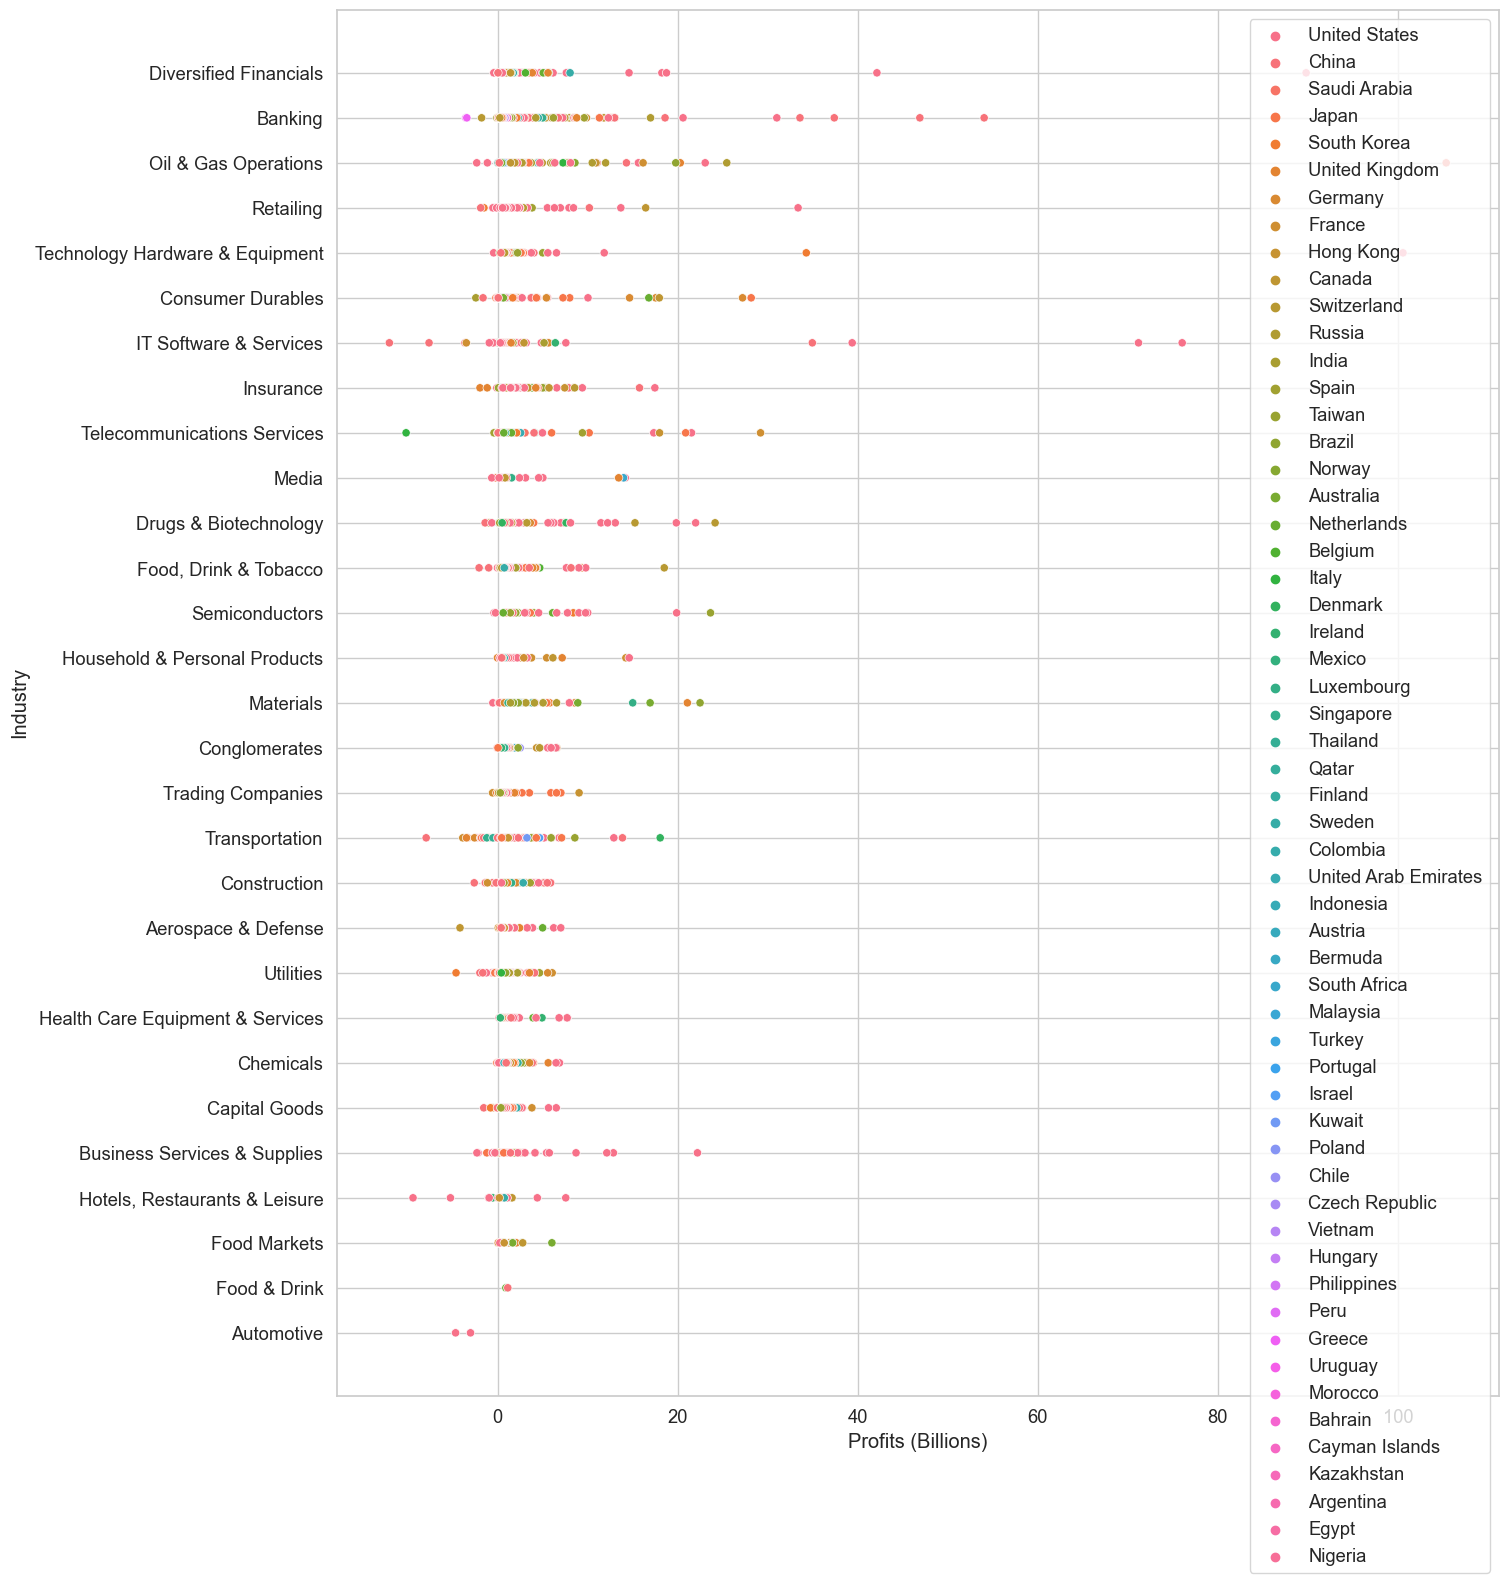

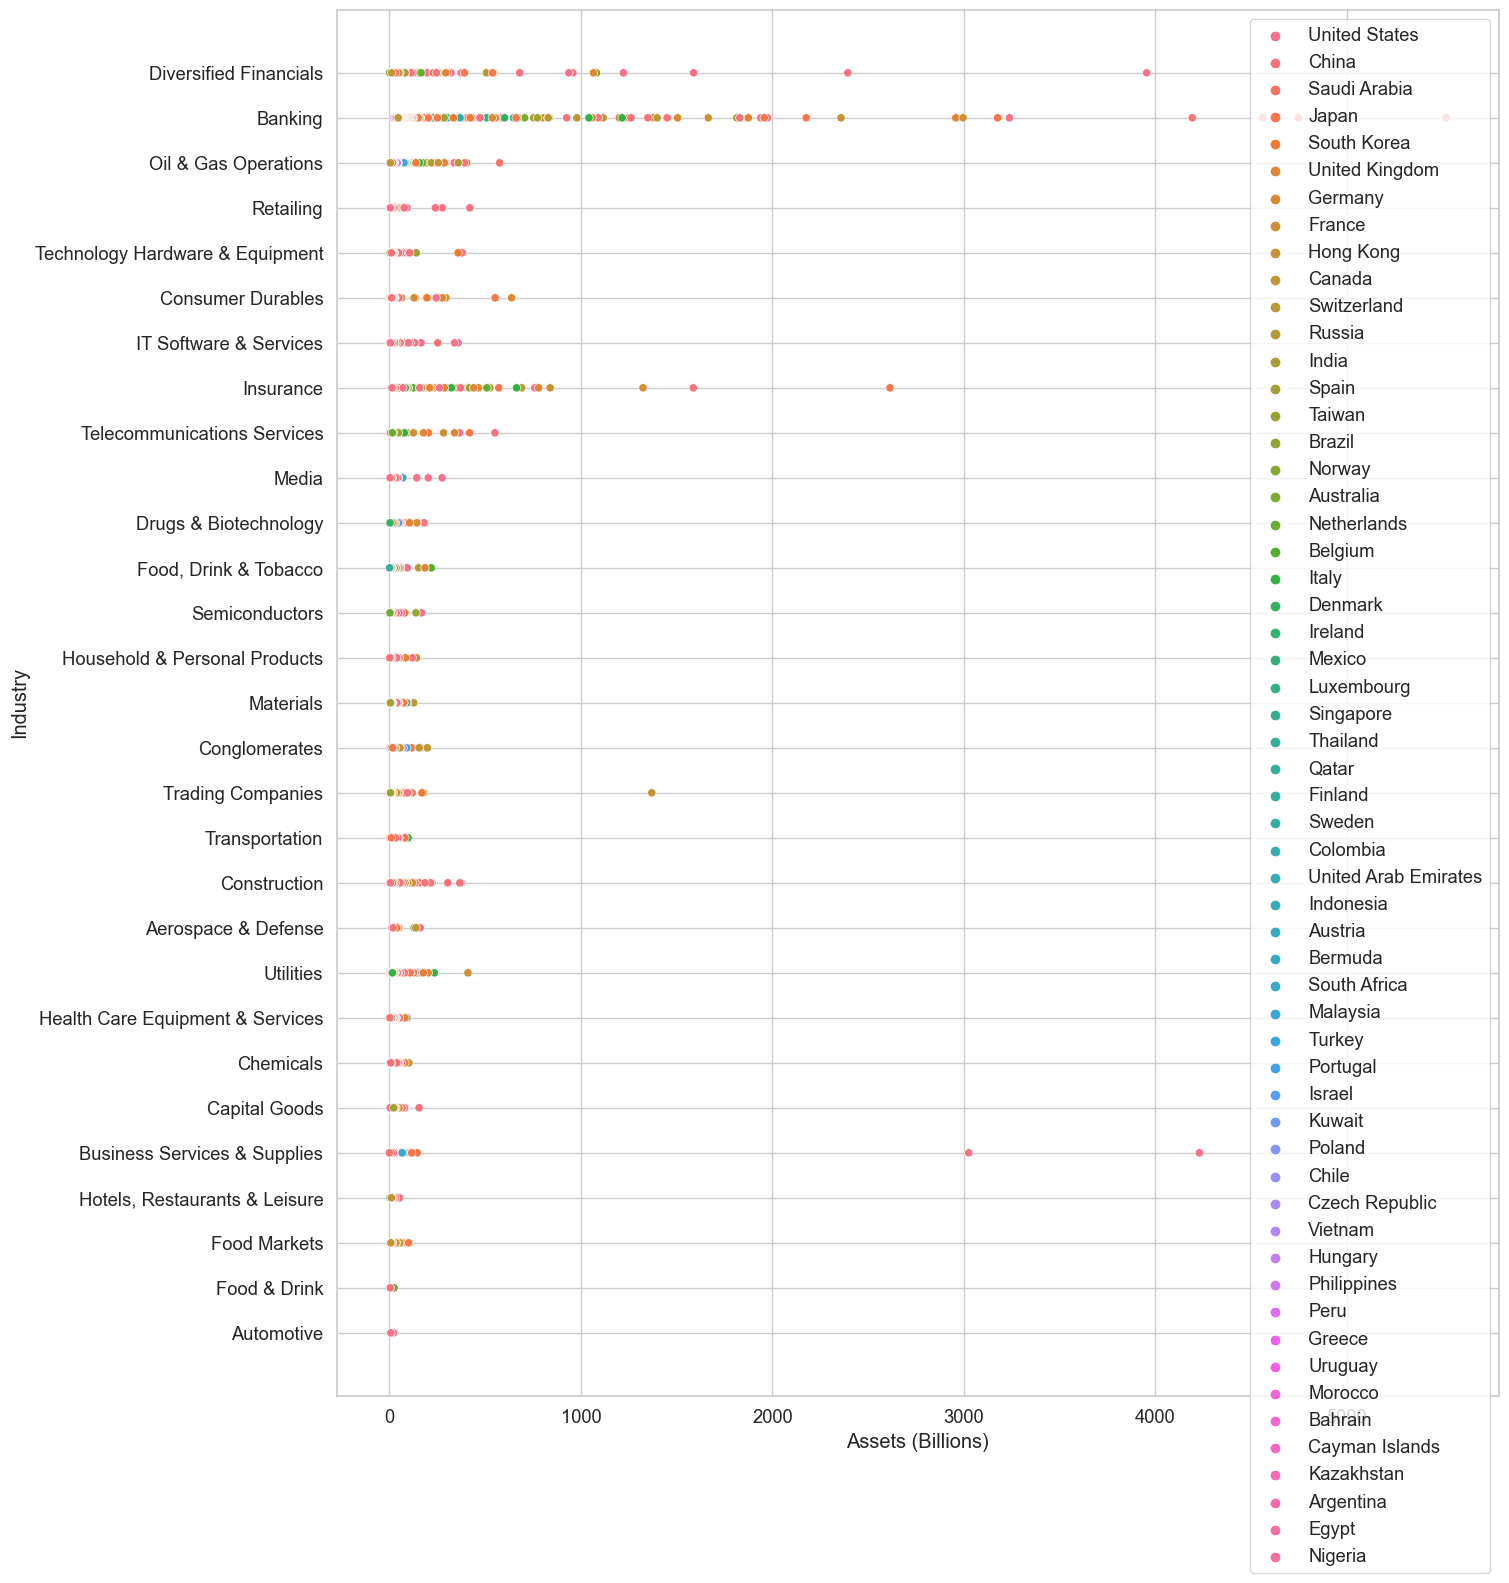

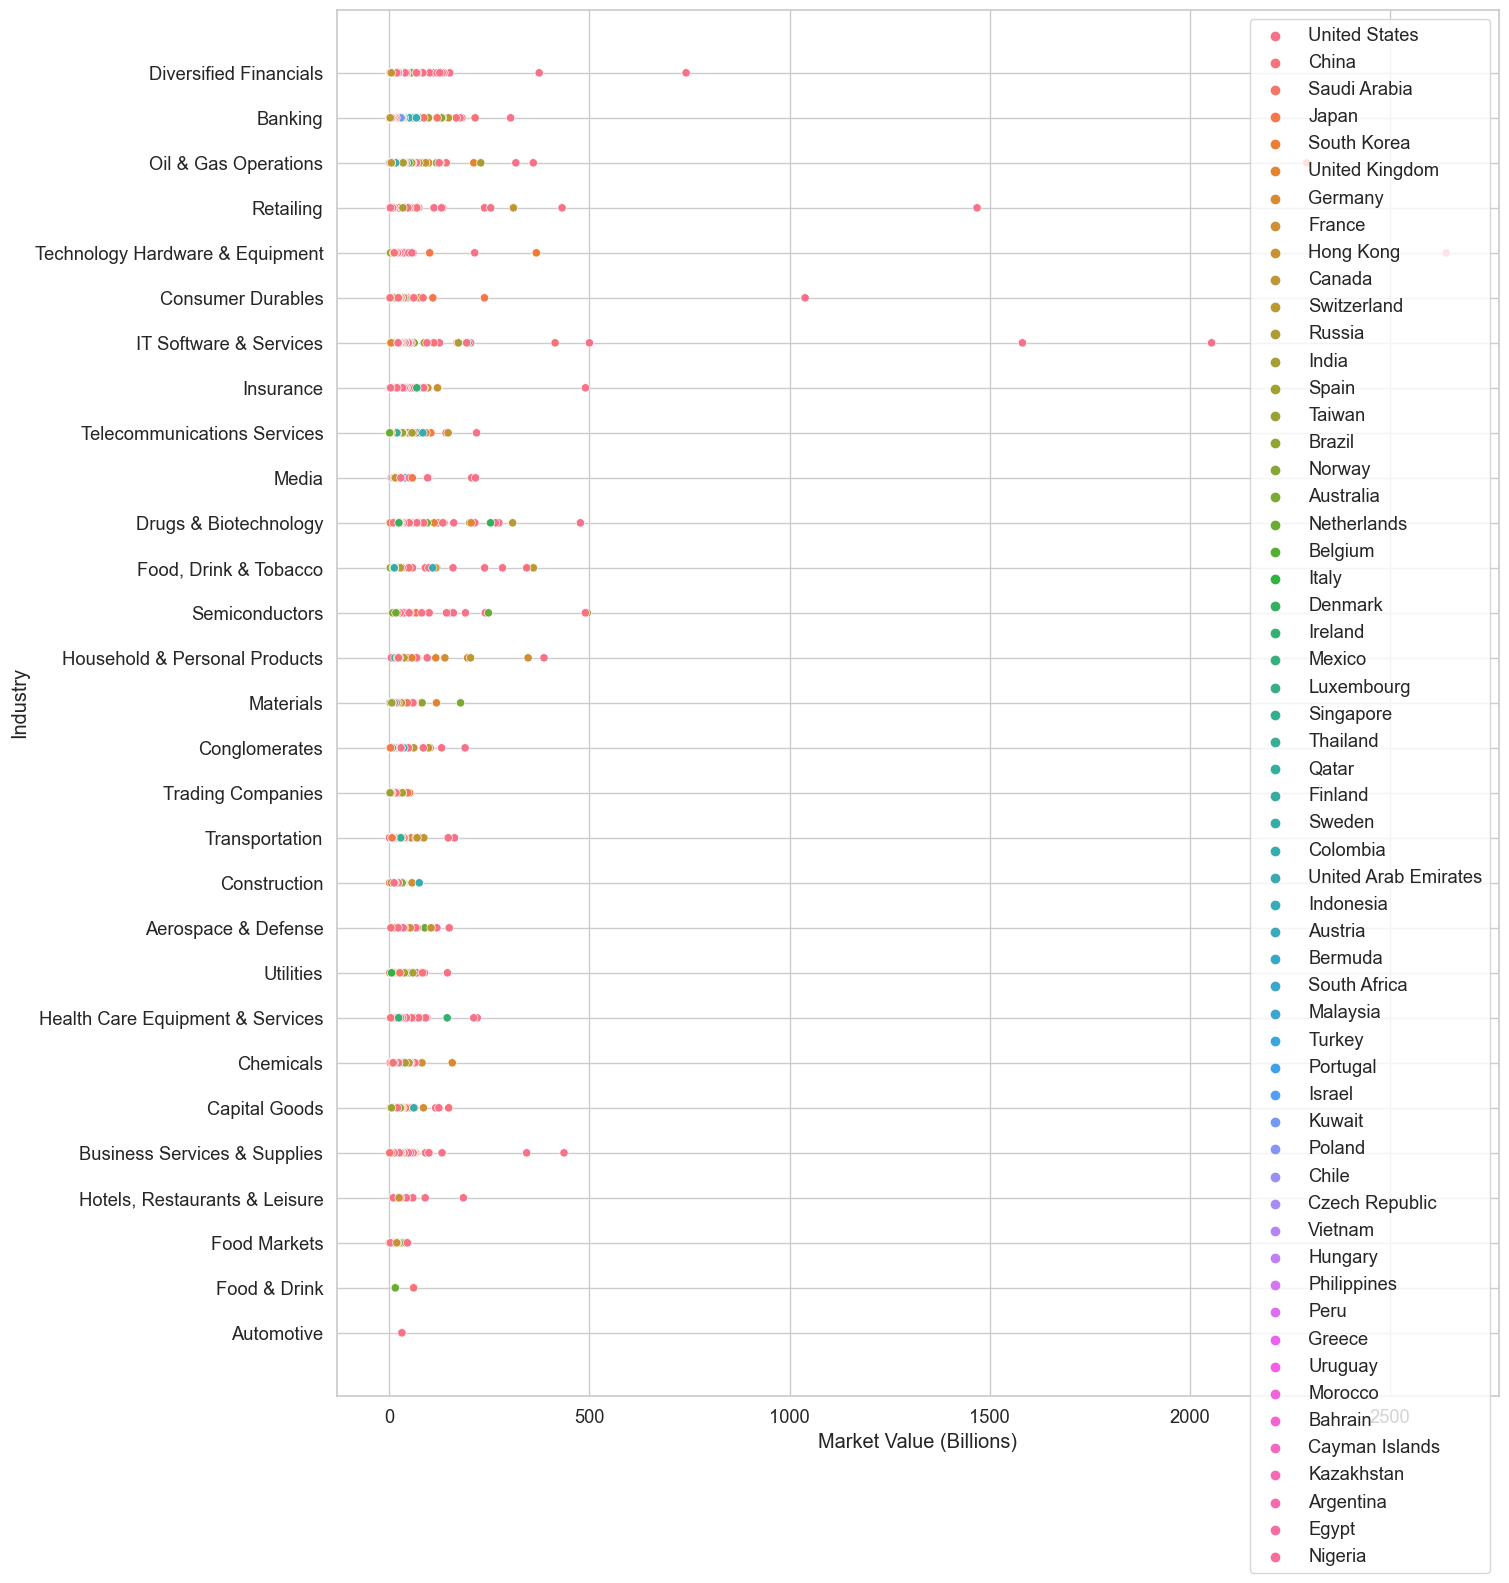

In [18]:
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Revenue (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2)
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Profits (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2)
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Assets (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

sns.set_theme(style="whitegrid",font_scale=1.2)
plt.figure(figsize=(15,18))
sns.scatterplot(data=df,x="Market Value (Billions)",y="Industry",hue="Country")
plt.legend(loc='upper right')
plt.show()

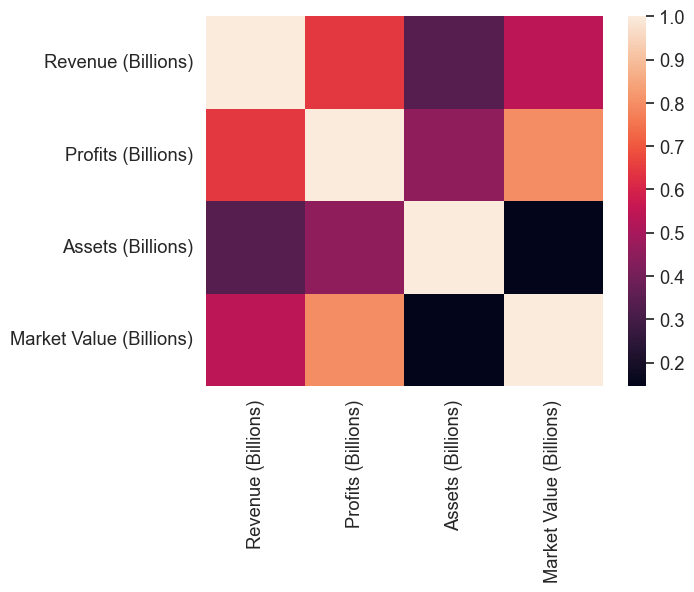

In [19]:
sns.heatmap(df[['Revenue (Billions)', 'Profits (Billions)', 'Assets (Billions)', 'Market Value (Billions)']].corr())
plt.show()

In [21]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [24]:
phik_overview= df.phik_matrix()

interval columns not set, guessing: ['2022 Ranking', 'Year Founded', 'Revenue (Billions)', 'Profits (Billions)', 'Assets (Billions)', 'Market Value (Billions)']


/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3494252. Are interval variables set correctly?
  warnings.warn(
/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3431324. Are interval variables set correctly?
  warnings.warn(
/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3924037. Are interval variables set correctly?
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
phik_overview

In [ ]:
sns.heatmap(phik_overview)

In [ ]:
stopwords = set(STOPWORDS)
text = " ".join(df['Industry'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=50, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

stopwords = set(STOPWORDS)
text = " ".join(df['Country'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=50, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();